## This material is adjusted from Software carpentry, Clare Sloggett, and  can be found here.  
http://swcarpentry.github.io/python-novice-gapminder/  
https://github.com/aspp-apac/2019-data-tidying-and-visualisation

# Plotting with matplotlib

#### Questions you should be able to answer after this session
* How can I plot my data?

* How can I save my plot for publishing?


#### Objectives
* Create a time series plot showing a single data set.

* Create a scatter plot showing relationship between two data sets.


#### Matplotlib
* Commonly use a sub-library called matplotlib.pyplot.
* The Jupyter Notebook will render plots inline if we ask it to using a “magic” command.
* good [explainer for Matplotlib](http://pbpython.com/effective-matplotlib.html)


In [51]:
#inline plotting and importing matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

### Matplotlib is best run as in object oriented way
You will have a figure which is the canvas with the frame. The 'axes' object is the picutre you draw onto the canvas. You can draw multiple pictures aka 'axes' on the same canvas.

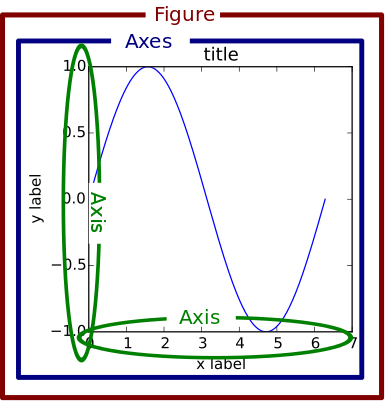

In [53]:
#from https://stackoverflow.com/questions/5575451/difference-between-axes-and-axis-in-matplotlib
Image(filename='./fig/Fig_axes_in_matplotlib.png')

Text(0, 0.5, 'Position (km)')

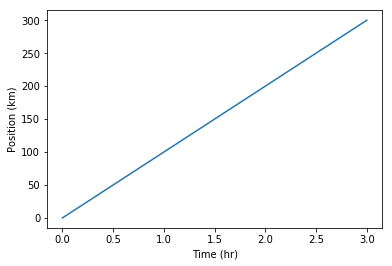

In [3]:
#explain fig and ax on the board
fig, ax = plt.subplots()
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

ax.plot(time, position)

ax.set_xlabel('Time (hr)')
ax.set_ylabel('Position (km)')

### Matplotlib can interpret intergers and floats as you would expect
If you have a number encoded as a string convert it to a int or float type so it interprets numbers as expected.

In [4]:
#import asia this time
asia = pd.read_csv('./data/gapminder_gdp_asia.csv', index_col='country')

#rename the columns and plot
new_column_name = asia.columns.str.strip('gdpPercap_').astype(int)

asia_new = asia.rename(columns=dict(zip(asia.columns, new_column_name)))

### Matplotlib is REALLY finetunable 
This is its strenght and weakness.

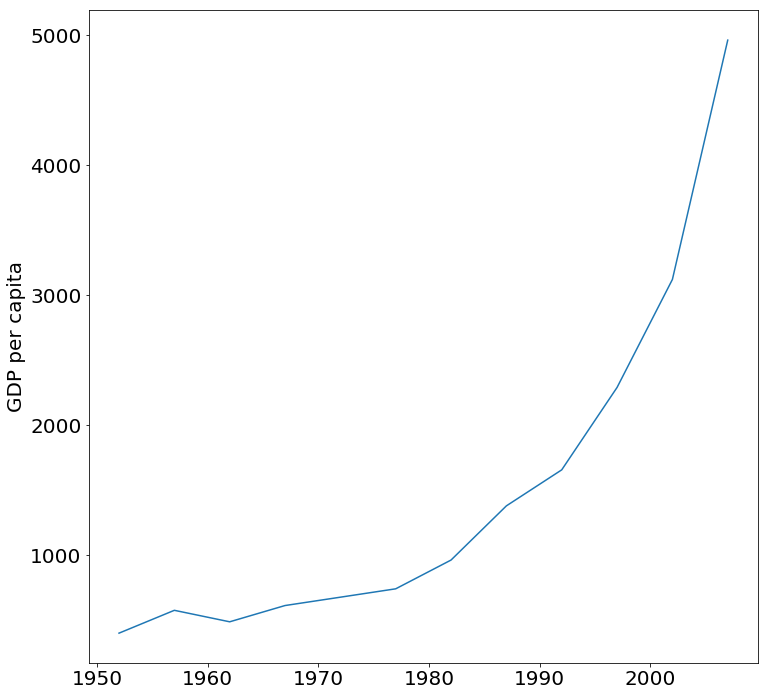

In [37]:
fig, ax = plt.subplots(figsize=(12,12))

ax.plot(asia_new.columns ,asia_new.loc['China'] )

ax.set_ylabel('GDP per capita', fontdict={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)

### Matplotlib lets you plot different plot types easily
* .plot = lineplot
* .bar = bar graph
* .scatter = scatter plot
* .boxplot = box plots
* .violinplot = violin plot
* many many more. See gallery [here](https://matplotlib.org/gallery/index.html). 

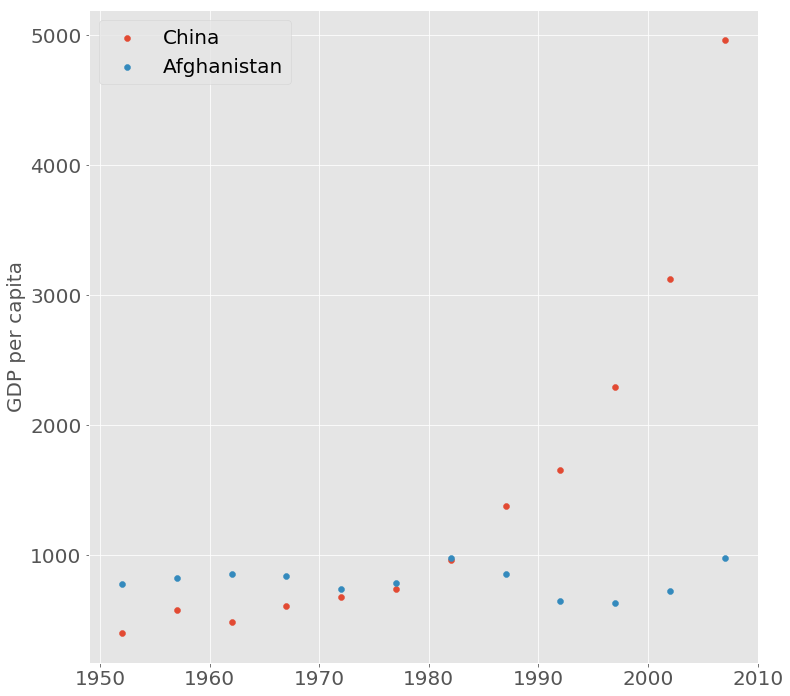

In [54]:
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(asia_new.columns, asia_new.loc['China', :] )
ax.scatter(asia_new.columns, asia_new.loc['Afghanistan', :] )


ax.set_ylabel('GDP per capita', fontdict={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend(prop={'size': 20}, loc=2)

### Matplotlib has different plotting styles


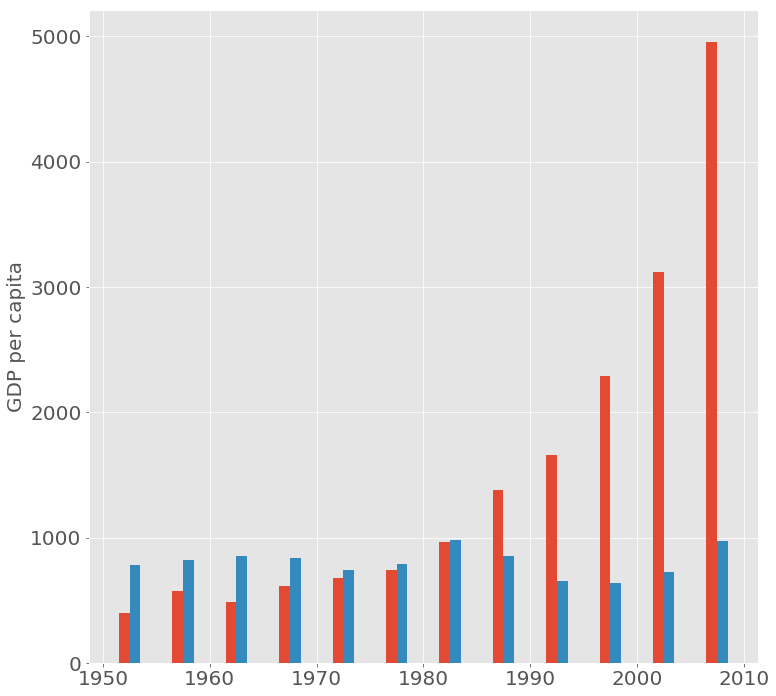

In [27]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12,12))

bar_with = 1

ax.bar(asia_new.columns, asia_new.loc['China', :]\
       , bar_with )
ax.bar(asia_new.columns + bar_with, asia_new.loc['Afghanistan', :],\
      bar_with)


ax.set_ylabel('GDP per capita', fontdict={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)

#### Exercise
Copy over the raw text into a new code cell. Fill in the blanks below to plot the minimum and maximum GDP per capita over time for all the countries in Europe. Try to explain what the other bits and pieces do.

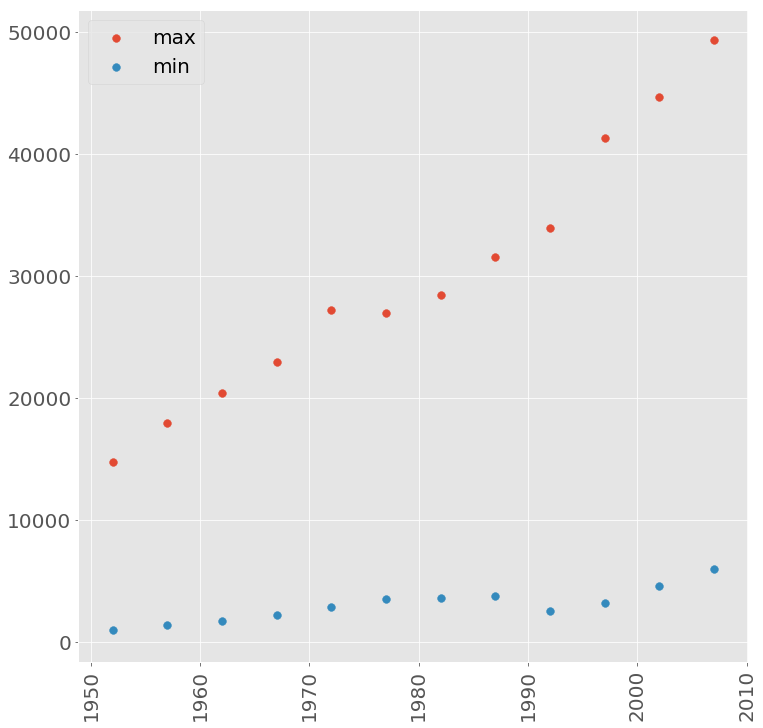

In [50]:
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')

fig, ax = plt.subplots(figsize=(12,12))

max_per_year_europe = data_europe.max()
min_per_year_europe = data_europe.min()

years = data_europe.columns.str.strip('gdpPercap_').astype(int)

ax.scatter(years, max_per_year_europe, label = 'max', s = 60)
ax.scatter(years, min_per_year_europe, label = 'min', s = 60)

ax.legend(loc='best', prop={'size':20})
ax.tick_params(axis='x', rotation=90, labelsize=20)
ax.tick_params(axis='y', labelsize=20)

#### Excercise
Modify the example in the notes to create a scatter plot showing the relationship between the minimum and maximum GDP per capita among the countries in Asia for each year in the data set. What relationship do you see (if any)?

Start thinking about the following:
* Read in the gdp from asia using from_csv
* make the the fig, ax using plt.subplots()
* calculate min and max for asia over the time using the describe method within the dataframe object. 
* transpose your dataframe
* plot ax.scatter with min and max

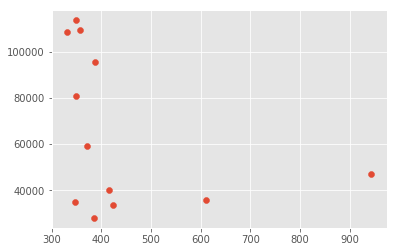

In [49]:
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')

fig, ax = plt.subplots()

ax.scatter(data_asia.describe().T['min'], data_asia.describe().T['max'])

### Matplotlib lets you save files in different formats
The figure can be saved with its intrinsic function .savefig. It will save the current figure to file. The file format will automatically be deduced from the file name extension (formats are pdf, ps, eps, png, and svg). You can also adjust the resolution with dpi = .

In [55]:
fig.savefig('test.png')

## Ploting with Seaborn a modern plotting library
[Seaborn](https://seaborn.pydata.org/) is a simpler statistical plotting library. 

This part is based on https://github.com/aspp-apac/2019-data-tidying-and-visualisation


Seaborn builds on Matplotlib. Some nice features are:

* works directly with Pandas dataframes, concise syntax
* lots of plot types, including some more advanced options
* statistical plotting: many plots do summary statistics for you
* good default aesthetics and easy control of aesthetics
* using Matplotlib gives benefits of Matplotlib - many backends, lots of control
* underlying Matplotlib objects are easy to tweak directly

#### Setup

In [56]:
import pandas as pd
import numpy as np

Be aware that Seaborn automatically changes Matplotlib's defaults on import. Not only your Seaborn plots, but also your Matplotlib plots, will look different once Seaborn is imported. If you don't want this behaviour, you can call sns.reset_orig() after import.

In [57]:
import seaborn as sns

In [58]:
sales = pd.read_csv("./data/housing-data-10000.csv", 
                    usecols=['id','date','price','zipcode','lat','long', 'bedrooms',
                             'waterfront','view','grade','sqft_living','sqft_lot'],
                    parse_dates=['date'], 
                    dtype={'zipcode': 'category',
                           'waterfront': 'bool'})

In [59]:
sales.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,waterfront,view,grade,zipcode,lat,long
0,1446800660,2015-03-16,276500.0,4,1400,6650,False,0,6,98168,47.4888,-122.332
1,1453601502,2015-02-26,303697.0,4,2520,7334,False,0,7,98125,47.7263,-122.291
2,9523103990,2014-12-08,611000.0,3,1850,5000,False,0,7,98103,47.6727,-122.351
3,7308600040,2014-07-23,769995.0,5,3360,12080,False,0,9,98011,47.7757,-122.173
4,1562200240,2014-09-18,550000.0,3,2160,15360,False,0,8,98007,47.6232,-122.138


In [60]:
sales.dtypes


id                      int64
date           datetime64[ns]
price                 float64
bedrooms                int64
sqft_living             int64
sqft_lot                int64
waterfront               bool
view                    int64
grade                   int64
zipcode              category
lat                   float64
long                  float64
dtype: object

Note that as well as specifying that the date field should be parsed as a date, we specified that certain variables are categorical (as opposed to integers). Some plotting commands understand pandas DataFrames and will treat categorical variables differently to numerical variables.

### Toy data

In [61]:
from io import StringIO

data_string = """name	number	engine_type	colour	wheels	top_speed_mph	weight_tons
Thomas	1	Tank	Blue	6	40	52
Edward	2	Tender	Blue	14	70	41
Henry	3	Tender	Green	18	90	72.2
Gordon	4	Tender	Blue	18	100	91.35
James	5	Tender	Red	14	70	46
Percy	6	Tank	Green	4	40	22.85
Toby	7	Tank	Brown	6	20	27
Emily	12	Tender	Green	8	85	45
Rosie	37	Tank	Purple	6	65	37
Hiro	51	Tender	Black	20	55	76.8"""

trains = pd.read_table(StringIO(data_string))
trains['size'] = pd.cut(trains['weight_tons'], 3, labels=['Small','Medium','Big'])

trains

,name,number,engine_type,colour,wheels,top_speed_mph,weight_tons,size
0,Thomas,1,Tank,Blue,6,40,52.00,Medium
1,Edward,2,Tender,Blue,14,70,41.00,Small
2,Henry,3,Tender,Green,18,90,72.20,Big
3,Gordon,4,Tender,Blue,18,100,91.35,Big
4,James,5,Tender,Red,14,70,46.00,Medium
5,Percy,6,Tank,Green,4,40,22.85,Small
6,Toby,7,Tank,Brown,6,20,27.00,Small
7,Emily,12,Tender,Green,8,85,45.00,Small
8,Rosie,37,Tank,Purple,6,65,37.00,Small
9,Hiro,51,Tender,Black,20,55,76.80,Big


Text(1, 12, 'where it all went wrong')

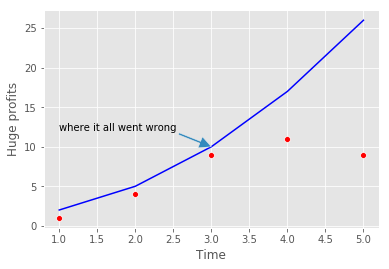

In [62]:
df = pd.DataFrame({
    'Time': [1,2,3,4,5],
    'Projected': [2,5,10,17,26],
    'Actual': [1,4,9,11,9]
})

fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Time', y='Actual', color='red', ax=ax)
sns.lineplot(data=df, x='Time', y='Projected', color='blue', ax=ax)

ax.set_ylabel('Huge profits')

ax.annotate("where it all went wrong", 
                                 xy=(3,10), xytext=(1,12),
                                 arrowprops={'width':2})

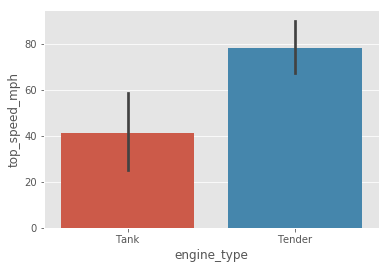

In [75]:
fig, ax = plt.subplots()
sns.barplot(data=trains, x='engine_type', y='top_speed_mph', ax=ax)


Here Seaborn has interpreted the x and y arguments as field names in the supplied DataFrame. Notice also that Seaborn has performed the summary statistics for us - in this case, using the default estimator, which is mean().

Notice also what happens if we simply swap the x and y parameters. Seaborn will automatically deduce that the categorical or string-like variable must be the bar labels, and the numeric variable must be the numeric axis:

#### Exercise
Create a (vertical) bar plot using the **sales** data, showing how house prices vary with the value of the property grade.

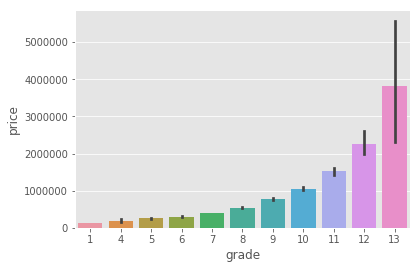

In [64]:
sns.barplot(data=sales, x='grade', y='price')

Bar plots are often deplored as a way of showing statistical estimates, as only the top of the bar is really important, and the bar itself is a visual distraction. A point plot is an alternative, and plots like box plots can show more information. Several other plot types also show distributional information within categories.



#### Exercise: 

reproduce the plot you just made, using instead each of the Seaborn functions:

* pointplot()
* boxplot()
* violinplot() (try the scale parameter)
* boxenplot()
* stripplot() [SEE WARNING] (try the jitter parameter)
* swarmplot() [SEE WARNING]
Note what sort of information about the distribution is shown by each.

WARNING: stripplot() and swarmplot() will plot individual data points. There are too many house sales to easily display in this way - you may want to subsample the dataframe with e.g.  data=sales.sample(100).

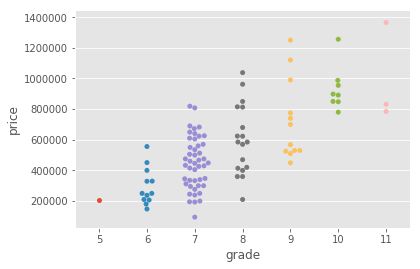

In [65]:
sns.swarmplot(data=sales.sample(100), x='grade', y='price')

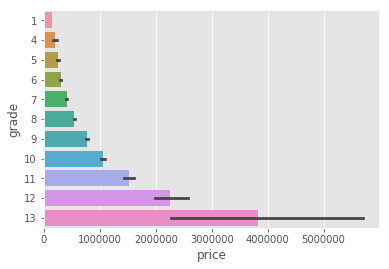

In [66]:
sns.barplot(data=sales, x='price', y='grade', orient='h')

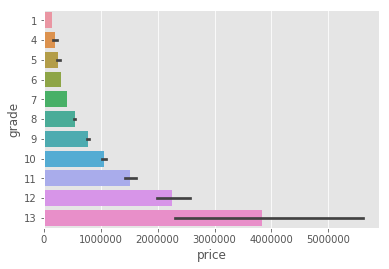

In [67]:
sales_fixed = sales.copy()
sales_fixed['grade'] = sales['grade'].astype('category')

sns.barplot(data=sales_fixed, x='price', y='grade')

### Hue
Many Seaborn plotting functions take a hue parameter. This colours the plot elements by some categorical variable, but more than this, summary statistics are calculated for each level of the hue variable.

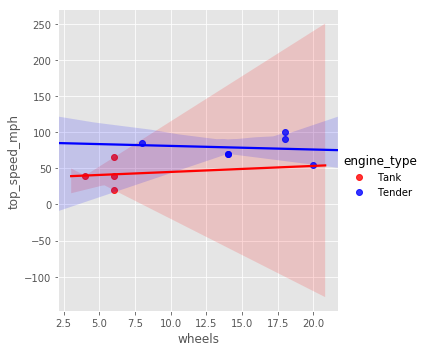

In [68]:
# It appears that my hypothesis that more wheels make you faster is flawed
sns.lmplot(data=trains, x='wheels', y='top_speed_mph', 
           hue='engine_type', palette=['red', 'blue'])

#### Excerises
* Create an lmplot of house price against living area. Do this without a hue parameter, then add in waterfront as the hue parameter. What information is the hue giving in this case?
* Try adding the hue parameter to one of your previous plots of some other type - for instance, a box plot.

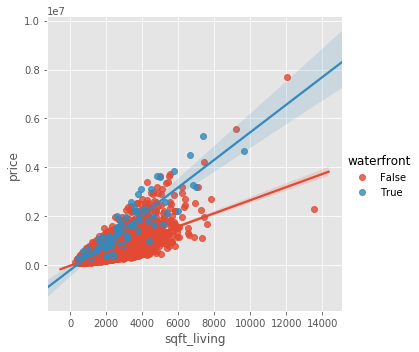

In [69]:
sns.lmplot(data=sales, x='sqft_living', y='price', hue='waterfront')

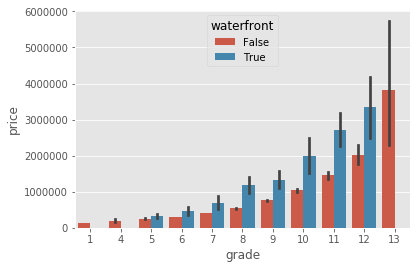

In [70]:
sns.barplot(data=sales, x='grade', y='price', hue='waterfront')

#### Compound plots

Seaborn has some plotting functions which create more complex figures made of multiple subplots. These include pairplot(), catplot(), jointplot(), lmplot() and clustermap(). Let's see a few examples:

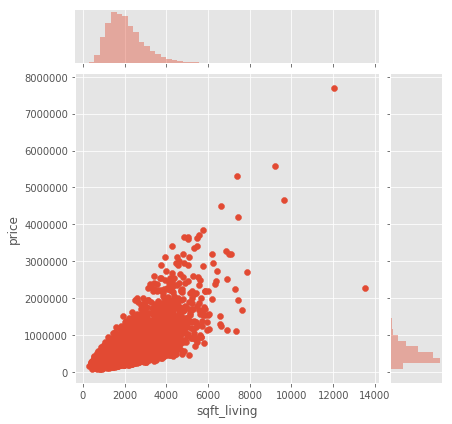

In [71]:
# jointplot shows a scatter or density plot, with marginal distributions
sns.jointplot(data=sales, x='sqft_living', y='price') #, kind='reg')

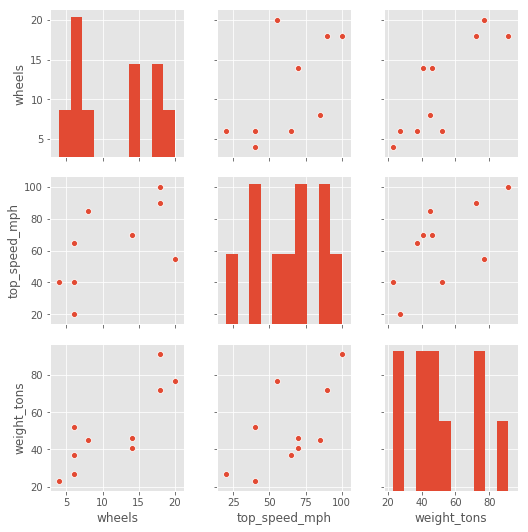

In [72]:

# pairplot shows pairwise relationships between variables
# Note that a variable like engine_type would be ignored as it is not numeric
sns.pairplot(data=trains[['wheels', 'top_speed_mph', 'weight_tons']])

# TODO: maybe demo with sales

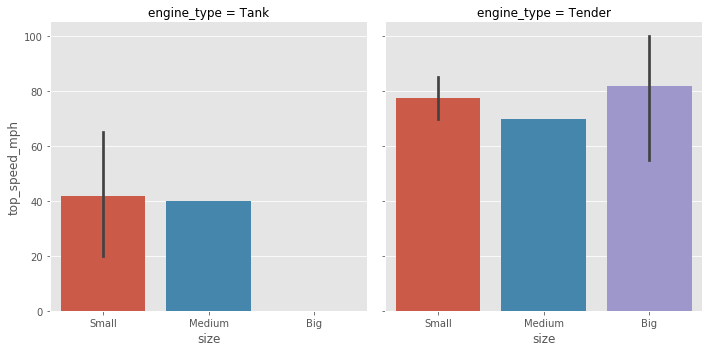

In [73]:
# catplot conditions different subplots on different variable values
# we map variables to row and column of a grid of plots (as well as to hue)
# in this example, we just use columns, and so have only one row
sns.catplot(data=trains, kind='bar',
               x='size', y='top_speed_mph', 
               col='engine_type')

#### Exercise: 
design a plot using sns.catplot, to show the relationship between house price and (at least): grade, waterfront, and view. Available channels of information are:

* x and y coordinates
* hue
* row and column of subplot (row and col)

You do not have to use all of these channels - in fact your plot may be difficult to take in if you do.

You can set the kind parameter to the kind of plot you want to make: point, bar, count, box, violin, and strip.

You can control the size of the overall figure with size and aspect.

/Users/benjamin/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


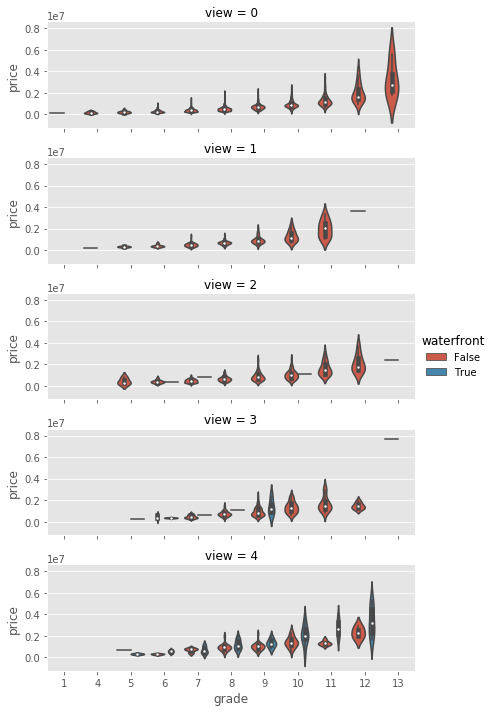

In [74]:
# One option
sns.catplot(data=sales, y='price', x='grade', row='view', hue='waterfront', kind='violin',
               kwargs={'scale':'width'}, size=2, aspect=3)